### Задания

#### Задание 1
В файле test_1 лежит результат теста. (target - какая-то целевая метрика)
[test_1.csv](https://edu.tinkoff.ru/media/edu-files-ext-100/00a4f74e-26a3-4785-9d06-f1d3bed3e5e3.csv)

Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

#### Решение

In [13]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

In [14]:
# загрузка датасета
df = pd.read_csv('test_1.csv')

df

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417
...,...,...,...
1993,control,1994,50.207788
1994,control,1995,51.715447
1995,control,1996,56.551077
1996,control,1997,47.178478


In [15]:
# выборка данных тестовой группы
test = df[df['group'] == 'test'].target

test

0       48.294046
1       50.561098
2       50.987911
3       47.819840
4       50.153417
          ...    
1005    49.265965
1006    49.575921
1007    49.521680
1008    48.505817
1009    48.880866
Name: target, Length: 1010, dtype: float64

In [16]:
# выборка данных контрольной группы
control = df[df['group'] == 'control'].target

control

1010    51.384842
1011    52.147493
1012    50.052900
1013    50.892682
1014    51.457104
          ...    
1993    50.207788
1994    51.715447
1995    56.551077
1996    47.178478
1997    49.434447
Name: target, Length: 988, dtype: float64

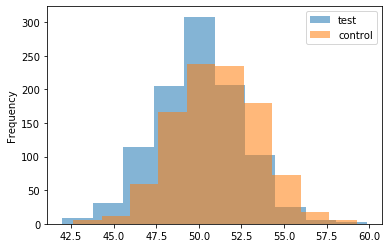

In [17]:
# построим распределение 
test.plot(kind='hist', alpha=0.55, legend=True, label='test')
control.plot(kind='hist', alpha=0.55, legend=True, label='control');

In [18]:
# проведем тест Шапиро-Уилка на нормальность тестовой выборки
alpha = 0.05

result = st.shapiro(test)

if result[1] > alpha:
    print('Распределение нормальное.')
else:
    print('Распределение не является нормальным.')

Распределение нормальное.


In [19]:
# проведем тест Шапиро-Уилка на нормальность контрольной выборки
alpha = 0.05

result = st.shapiro(control)

if result[1] > alpha:
    print('Распределение нормальное.')
else:
    print('Распределение не является нормальным.')

Распределение нормальное.


In [20]:
# t-test проверка двух средних независимых выборок
alpha = 0.05

res = st.ttest_ind(test, control)

if res.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу о равенстве средних двух выборок.')
else:
    print('У нас не достаточно оснований, чтобы отвергнуть нулевую гипотезу и принять альтернативную.')

Отвергаем нулевую гипотезу о равенстве средних двух выборок.


#### Задание 2
В файле test_2 лежит результат теста, который был нацелен на увеличение суммы чека клиента ([test_2.csv](https://edu.tinkoff.ru/media/edu-files-ext-100/a960d121-84cb-4ae2-88d0-c18a87dd38a4.csv))

Изучите результаты теста и сделайте вывод, увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

#### Решение

In [21]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

In [22]:
# загрузка датасета
df = pd.read_csv('test_2.csv')

df

,group,client_id,avg_sum
0,test,1,156.686451
1,test,2,342.625859
2,test,3,79.712120
3,test,4,493.110807
4,test,5,124.135016
...,...,...,...
595,control,596,209.075972
596,control,597,57.990291
597,control,598,42.577037
598,control,599,178.320097


In [23]:
# выборка данных тестовой группы
test = df[df['group'] == 'test'].avg_sum

test

0      156.686451
1      342.625859
2       79.712120
3      493.110807
4      124.135016
          ...    
301    334.414590
302    121.499426
303     57.660136
304      3.959158
305    144.955002
Name: avg_sum, Length: 306, dtype: float64

In [24]:
# выборка данных контрольной группы
control = df[df['group'] == 'control'].avg_sum

control

306    141.258738
307      9.723965
308      6.561793
309    164.938532
310    197.558111
          ...    
595    209.075972
596     57.990291
597     42.577037
598    178.320097
599     78.746824
Name: avg_sum, Length: 294, dtype: float64

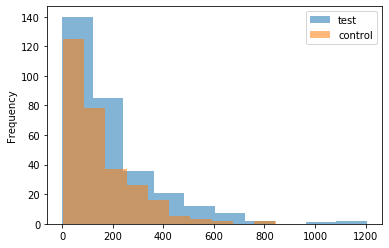

In [25]:
# построим распределение 
test.plot(kind='hist', alpha=0.55, legend=True, label='test')
control.plot(kind='hist', alpha=0.55, legend=True, label='control');

In [26]:
# проведем тест Шапиро-Уилка на нормальность тестовой выборки
alpha = 0.05

result = st.shapiro(test)

if result[1] > alpha:
    print('Распределение нормальное.')
else:
    print('Распределение не является нормальным.')

Распределение не является нормальным.


In [27]:
# проведем тест Шапиро-Уилка на нормальность контрольной выборки
alpha = 0.05

result = st.shapiro(control)

if result[1] > alpha:
    print('Распределение нормальное.')
else:
    print('Распределение не является нормальным.')

Распределение не является нормальным.


In [28]:
# Используем непараметрический тест Манна-Уитни
alpha = 0.05

result = st.mannwhitneyu(test, control, alternative='two-sided')

# результат (вывод)
if result[1] <= alpha:
    print('Удалось достичь статзначимого различия.')
    if test.mean() > control.mean():
        print('Сумма чека увеличилась.')
    else:
        print('Сумма чека уменьшилась.')
else:
    print('Статзначимого различия достичь не удалось. Не можем судить о влиянии теста на сумму среднего чека.')

Удалось достичь статзначимого различия.
Сумма чека увеличилась.


#### Задание 3
В файле test_3 лежит результат теста рассылки email, целевая метрика - конверсия в переход на сайт с этого email ([test_3.csv](https://edu.tinkoff.ru/media/edu-files-ext-100/3831f6ba-df5c-4523-b9b6-67d7123d6b96.csv)).

Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

#### Решение

In [29]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [30]:
# загрузка датасета
df = pd.read_csv('test_3.csv')

df

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1
...,...,...,...
20028,control,20029,0
20029,control,20030,1
20030,control,20031,1
20031,control,20032,0


In [31]:
# выборка данных тестовой группы
test = df[df['group'] == 'test'].click_flg

test

0        1
1        0
2        0
3        1
4        1
        ..
10018    1
10019    0
10020    0
10021    0
10022    1
Name: click_flg, Length: 10023, dtype: int64

In [32]:
# выборка данных контрольной группы
control = df[df['group'] == 'control'].click_flg

control

10023    0
10024    0
10025    0
10026    0
10027    0
        ..
20028    0
20029    1
20030    1
20031    0
20032    0
Name: click_flg, Length: 10010, dtype: int64

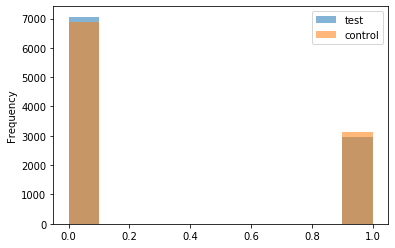

In [33]:
# построим распределение 
test.plot(kind='hist', alpha=0.55, legend=True, label='test')
control.plot(kind='hist', alpha=0.55, legend=True, label='control');

In [34]:
# проведем Z-test для двух выборок c биномиальным распределением
alpha = 0.05

zscore, pvalue = proportions_ztest([sum(test), sum(control)], [len(test), len(control)], alternative = 'two-sided')
print('zscore = {:.4f}, pvalue = {:.4f}'.format(zscore, pvalue))

if pvalue <= alpha:
    print('Результат теста cтатзначимый.')
    if test.mean() > control.mean():
        print('Удалось увеличить конверсию.')
    else:
        print('Конверсию увеличить не удалось.')
else:
    print('Не удалось отвергнуть нулевую гипотезу о равенстве результатов и получить статзначимый результат.')

zscore = -2.5952, pvalue = 0.0095
Результат теста cтатзначимый.
Конверсию увеличить не удалось.
